<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [9]:
import pandas as pd

#read in data for 2021 air quality of Chatham Roadside
url = "https://raw.githubusercontent.com/bjentwistle/PythonFundamentals/main/Datasets/NO2-measured-data-2020-2021-Chatham-Roadside%20-%20NO2-measurement-data-2020-2021.csv"
air_quality_2020 = pd.read_csv(url,skiprows=[0])

#remove 'nodata' rows from Nitrogen Dioxide column
for i in air_quality_2020.index:
  if air_quality_2020.loc[i, "Nitrogen dioxide"] == "nodata":
    air_quality_2020.drop(i, inplace = True) 

air_quality_2020.dtypes

Date                object
Time                object
Nitrogen dioxide    object
Status              object
dtype: object

In [10]:
air_quality_2020
#air_quality_2020['Time'] = pd.to_datetime(air_quality_2020['Time'])

In [11]:
#convert all dates to Datetime format
air_quality_2020['Date'] = pd.to_datetime(air_quality_2020['Date'])
air_quality_2020['Time'] = pd.to_datetime(air_quality_2020['Time'])

#convert Nitrogen dioxide column to float type
air_quality_2020['Nitrogen dioxide'] = pd.Float64Index(air_quality_2020['Nitrogen dioxide'])

#sort by Nitrogen dioxide
air_quality_2020 = air_quality_2020.sort_values("Nitrogen dioxide")

#add new column called 'weekdays'
air_quality_2020["Weekdays"] = air_quality_2020['Date'].dt.strftime("%a")

#rename Nitrogen dioxide column to "NO2 Level (V ug/m2)"
air_quality_2020.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m2)"}, inplace =True)

#drop the Status column
air_quality_2020_v2 = air_quality_2020.drop(["Status"],axis=1)


#read in data for 2021 air quality of Chatham Roadside
url =  "https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ"
air_quality_2021 = pd.read_csv(url, skiprows=[0])

#remove 'nodata' rows from Nitrogen Dioxide column
for x in air_quality_2021.index:
  if air_quality_2021.loc[x, "Nitrogen dioxide"] == "nodata":
    air_quality_2021.drop(x, inplace = True) 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#Do the same with 2021 dataset - convert all dates to Datetime format
air_quality_2021['Date'] = pd.to_datetime(air_quality_2021['Date'])
#air_quality_2021['Time'] = pd.to_datetime(air_quality_2021['Time'])

#convert Nitrogen dioxide column to float type
air_quality_2021['Nitrogen dioxide'] = pd.Float64Index(air_quality_2021['Nitrogen dioxide'])

#sort by Nitrogen dioxide
air_quality_2021 = air_quality_2021.sort_values("Nitrogen dioxide")

#add new column called 'weekdays'
air_quality_2021["Weekdays"] = air_quality_2021['Date'].dt.strftime("%a")

#rename Nitrogen dioxide column to "NO2 Level (V ug/m2)"
air_quality_2021.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m2)"}, inplace =True)

#drop the Status column
air_quality_2021_v2 = air_quality_2021.drop(["Status"],axis=1)

print(air_quality_2020_v2)
print(air_quality_2021_v2)


           Date                Time  NO2 Level (V ug/m2) Weekdays
8668 2020-12-27 2022-03-10 05:00:00              0.42410      Sun
5712 2020-08-26 2022-03-10 01:00:00              0.58689      Wed
4489 2020-06-07 2022-03-10 02:00:00              0.58930      Sun
5714 2020-08-26 2022-03-10 03:00:00              0.59123      Wed
8669 2020-12-27 2022-03-10 06:00:00              0.65300      Sun
...         ...                 ...                  ...      ...
471  2020-01-20 2022-03-10 16:00:00             84.86896      Mon
808  2020-03-02 2022-03-10 17:00:00             87.10202      Mon
6206 2020-09-15 2022-03-10 15:00:00             87.96723      Tue
6209 2020-09-15 2022-03-10 18:00:00             92.13063      Tue
470  2020-01-20 2022-03-10 15:00:00            113.06189      Mon

[8632 rows x 4 columns]
           Date   Time  NO2 Level (V ug/m2) Weekdays
7177 2021-10-27  02:00             -0.77743      Wed
7009 2021-10-20  02:00             -0.54076      Wed
7107 2021-10-24  04:00  

In [6]:
import numpy as np

#concatenate the two years of data and sort by date then print as a test
combined_df = pd.concat([air_quality_2020_v2, air_quality_2021_v2], join='inner', ignore_index=True)
combined_df = combined_df.sort_values("Date")

#Calcuate the averages NO2 levels by weekdays (same as pivot below)
# average_NO2 = combined_df.groupby(["Weekdays"])["NO2 Level (V ug/m2)"].mean()
# print(type(average_NO2))

#Group by Weekdays and show smmary stats by day of the week
air_quality_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m2)", index = ["Weekdays"], aggfunc = np.mean)
print(air_quality_pivot)



          NO2 Level (V ug/m2)
Weekdays                     
Fri                 14.893637
Mon                 14.303682
Sat                 13.851765
Sun                 11.661928
Thu                 14.871229
Tue                 15.297219
Wed                 16.355849


## 10/3/2022 - Update 
Returning to this project after several week on the Data Accelerator course, I wanted to add some visualisations and possible predictions to this project.

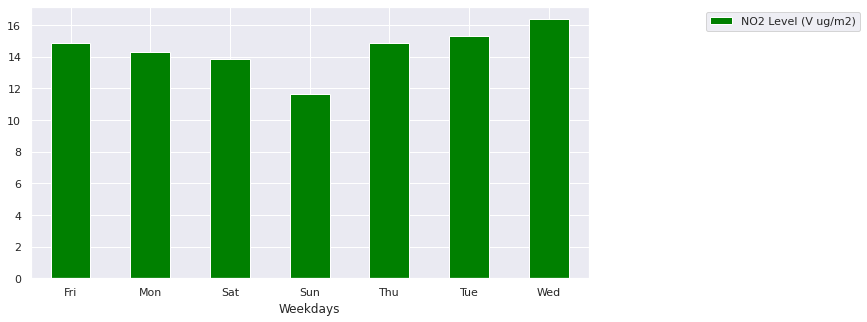

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# weekday_categories = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
# air_quality_pivot["Weekdays"] = pd.Categorical(air_quality_pivot["Weekdays"], categories = weekday_categories, ordered= True)
# #air_quality_pivot.sort_values("Weekdays")
# print(air_quality_pivot)
#THIS CODE ABOVE DOES NOT WORK DUE TO WEEKDAYS BECOMING THE INDEX AND HENCE CAN"T BE SORTED CATEGORICALLY
sns.set(rc = {'figure.figsize':(10,5)})
air_quality_pivot.plot(kind='bar', color = "green").legend(bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)
plt.show()

This plot of NO2 levels plotted by the day they were recorded shows very clearly that Sunday is when there are the least number of cars on the road. Conversely, the busiest days of the week have the highest levels of NO2.

It would be interesting to see what the levels are like at different times of the day too.


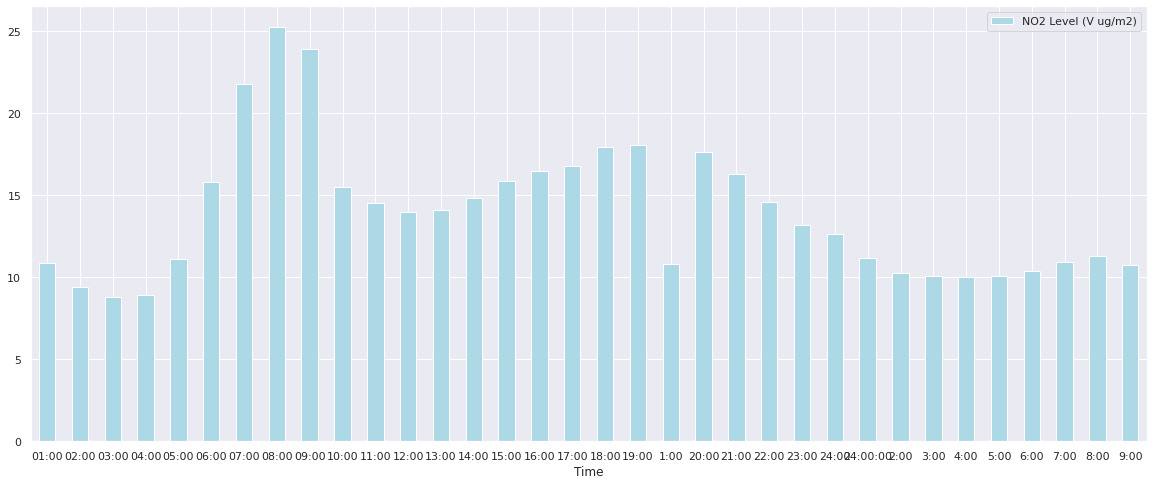

In [8]:
#Group by time and show summary stats by day of the week
air_quality__time_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m2)", index = ["Time"], aggfunc = np.mean)
#print(air_quality__time_pivot)
sns.set(rc = {'figure.figsize':(20,8)})
air_quality__time_pivot.plot(kind='bar', color = "lightblue").legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

This plot shows the peak times during the day when the highest levels coincide with 'rush hour' times. 

### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
